In [ ]:
pip install speechbrain

#X-vectors - LibriSpeech- PreTraining Autoencoders

##Get dataset Librispeech

In [ ]:
import zipfile
import os
from google.colab import drive
import speechbrain

In [ ]:
drive.mount('/content/drive')

In [ ]:
!mkdir /content/libriSpeech/
!mkdir /content/libriSpeech/val_data
!mkdir /content/libriSpeech/train_data

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/LibriSpeech/dev_clean.zip', 'r') as zip_ref:
        zip_ref.extractall('/content/libriSpeech/val_data')
with zipfile.ZipFile('/content/drive/MyDrive/LibriSpeech/train-clean-100.zip', 'r') as zip_ref:
        zip_ref.extractall('/content/libriSpeech/train_data')

>Sanity check xVectors

In [ ]:
!pip install umap-learn
import umap.umap_ as umap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.5 MB/s eta 0:00:00


In [ ]:
import torch
import torchaudio
from speechbrain.inference.speaker import EncoderClassifier

import os

import numpy as np

In [ ]:
folder = '/content/libriSpeech/val_data/1272/128104'
for files in os.listdir(folder):
  print(folder + '/' + files)

/content/libriSpeech/val_data/1272/128104/1272-128104-0011.flac
/content/libriSpeech/val_data/1272/128104/1272-128104-0008.flac
/content/libriSpeech/val_data/1272/128104/1272-128104-0001.flac
/content/libriSpeech/val_data/1272/128104/1272-128104-0013.flac
/content/libriSpeech/val_data/1272/128104/1272-128104-0012.flac
/content/libriSpeech/val_data/1272/128104/1272-128104-0005.flac
/content/libriSpeech/val_data/1272/128104/1272-128104-0007.flac
/content/libriSpeech/val_data/1272/128104/1272-128104-0000.flac
/content/libriSpeech/val_data/1272/128104/1272-128104-0006.flac
/content/libriSpeech/val_data/1272/128104/1272-128104-0003.flac
/content/libriSpeech/val_data/1272/128104/1272-128104-0002.flac
/content/libriSpeech/val_data/1272/128104/1272-128104-0010.flac
/content/libriSpeech/val_data/1272/128104/1272-128104-0009.flac
/content/libriSpeech/val_data/1272/128104/.ipynb_checkpoints
/content/libriSpeech/val_data/1272/128104/1272-128104-0014.flac
/content/libriSpeech/val_data/1272/128104/1

In [ ]:
folder = '/content/libriSpeech/val_data/1272/128104'
classifier = EncoderClassifier.from_hparams(source="speechbrain/spkrec-xvect-voxceleb", savedir="pretrained_models/spkrec-xvect-voxceleb")
xVect_Embeds = []
for files in os.listdir(folder):
  if files[-5:] == '.flac':
    signal, fs = torchaudio.load(folder + '/' + files)
    embeddings = classifier.encode_batch(signal).reshape([1,512])
    xVect_Embeds.append(embeddings)


In [ ]:
y_xVect_Embeds = np.zeros(len(xVect_Embeds))

In [ ]:
xVect_Embeds = np.array(xVect_Embeds).reshape([15,512])

In [ ]:
from sklearn.decomposition import PCA
plotdata = []
pca = PCA(n_components=2)
pca_plot = pca.fit(xVect_Embeds)
plot = pca.transform(xVect_Embeds)

In [ ]:
def plot2d(x,y):
  plt.figure(figsize=(5,5))
  sc = plt.scatter(x[:,0],x[:,1],c=y)
  plt.rcParams['font.family'] = 'sans-serif'
  plt.legend(handles=sc.legend_elements()[0], labels=['Neutral'])
  plt.show

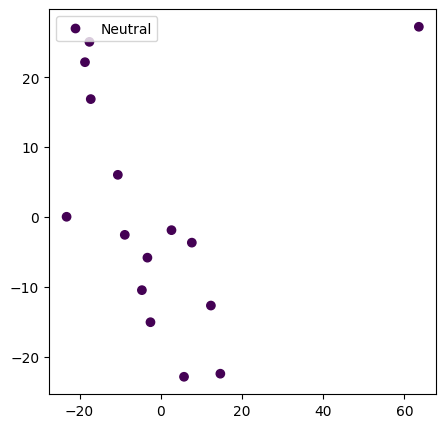

In [ ]:
plot2d(plot,y_xVect_Embeds)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


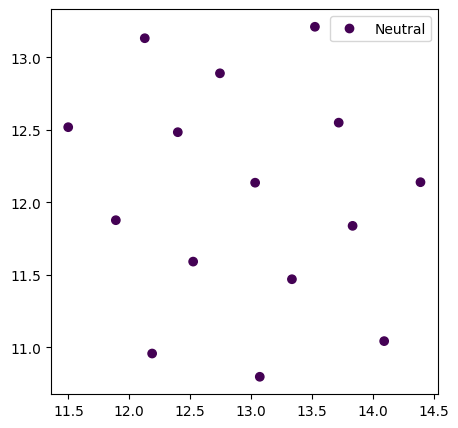

In [ ]:
x_umap2_StadisticsGlottal_CreamD = umap.UMAP(n_neighbors=3,n_components=2,min_dist=0.1,metric='euclidean').fit_transform(aver,y_xVect_Embeds)
plot2d(x_umap2_StadisticsGlottal_CreamD,y_xVect_Embeds)

##Create X-vectors Embeddings Dataset

In [ ]:
pip install speechbrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.1/760.1 kB 8.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
def Obtain_Embeddings(folder_path):
  path = folder_path
  classifier = EncoderClassifier.from_hparams(source="speechbrain/spkrec-xvect-voxceleb", savedir="pretrained_models/spkrec-xvect-voxceleb")
  ds_Embeds = []
  for folder in os.listdir(path):
    for folder2 in os.listdir(path + '/' + folder):
      for files in os.listdir(path + '/' + folder + '/' + folder2):
        if files[-5:] == '.flac':
          signal, fs = torchaudio.load(path + '/' + folder + '/' + folder2 + '/' + files)
          embeddings = classifier.encode_batch(signal).reshape([1,512])
          ds_Embeds.append(embeddings)

  return ds_Embeds


In [ ]:
embedings_val = Obtain_Embeddings('/content/libriSpeech/val_data')
print(len(embedings_val))
np.save('/content/drive/MyDrive/LibriSpeech/embedings_val.npy',embedings_val)

2703


In [ ]:
train_Embeds_LS = Obtain_Embeddings('/content/libriSpeech/train_data/train-clean-100')

In [ ]:
np.save('/content/drive/MyDrive/LibriSpeech/embedings_train_LS.npy',train_Embeds_LS)

#Autoencoders

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive

from sklearn.datasets import load_wine, load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score

import torch
from torch.nn import Sequential
from torch.nn import Linear, Sigmoid, Tanh
from torch.optim import Adam
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
embeds_ls_train = np.load('/content/drive/MyDrive/LibriSpeech/embedings_train_LS.npy')
embeds_ls_val = np.load('/content/drive/MyDrive/LibriSpeech/embedings_val.npy')

In [ ]:
train_dl = DataLoader(embeds_ls_train, 256, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(embeds_ls_val, 256, shuffle=True, num_workers=3, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [ ]:
device = get_default_device()
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [ ]:
class Base(torch.nn.Module):
    def training_step(self, batch):
        out = self(batch)
        loss = F.mse_loss(out, batch)
        return loss

    def validation_step(self, batch):
        out = self(batch)
        loss = F.mse_loss(out, batch)
        return {'val_loss': loss.detach()}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        return {'val_loss': epoch_loss.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss']))
        #print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}".format(epoch, result['lrs'][-1], result['train_loss'], result['val_loss']))

In [ ]:
class Modelo(Base):
  def __init__(self):
    super(Modelo, self).__init__()

    self.cod = Sequential(Linear(512, 256),
                          Tanh(),
                          Linear(256, 128),
                          Tanh(),
                          Linear(128, 64),
                          Tanh(),
                          Linear(64, 32),
                          Tanh(),
                          Linear(32, 16))
    self.dec = Sequential(Linear(16, 32),
                          Tanh(),
                          Linear(32, 64),
                          Tanh(),
                          Linear(64, 128),
                          Tanh(),
                          Linear(128, 256),
                          Tanh(),
                          Linear(256, 512))

  def forward(self, x):
    z = self.cod(x)
    x = self.dec(z)

    return x

In [ ]:
model_ac = to_device(Modelo(), device)

In [ ]:
@torch.no_grad()
def evaluate(model_ac, val_loader):
    model_ac.eval()
    outputs = [model_ac.validation_step(batch) for batch in val_loader]
    return model_ac.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def try_model(epochs, lr, model, train_loader, val_loader, weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    optimizer = opt_func(model.parameters(), lr, weight_decay=weight_decay)

    #sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))

    for epoch in range(epochs):

        model.train()
        train_losses = []
        lrs = []

        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)

            optimizer.zero_grad()
            loss.backward()


            if grad_clip:
                torch.nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()

            #lrs.append(get_lr(optimizer))
            #sched.step()

        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        #result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
epochs = 100
lr = 0.001
grad_clip = 0.1
weight_decay = 1e-5
opt_func = torch.optim.Adam

In [ ]:
history = [evaluate(model_ac, train_dl)]
history

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[{'val_loss': 200.68450927734375}]

In [ ]:
history += try_model(epochs, lr, model_ac, train_dl, valid_dl,
                             grad_clip=grad_clip,
                             weight_decay=weight_decay,
                             opt_func=opt_func)

Epoch [0], train_loss: 64.4232, val_loss: 22.2142
Epoch [1], train_loss: 18.7245, val_loss: 20.9309
Epoch [2], train_loss: 18.3298, val_loss: 20.8883
Epoch [3], train_loss: 18.3611, val_loss: 20.9235
Epoch [4], train_loss: 18.3700, val_loss: 20.8895
Epoch [5], train_loss: 18.3395, val_loss: 20.8923
Epoch [6], train_loss: 18.3393, val_loss: 20.8954
Epoch [7], train_loss: 18.3479, val_loss: 20.8794
Epoch [8], train_loss: 18.3494, val_loss: 20.9346
Epoch [9], train_loss: 18.3491, val_loss: 20.8776
Epoch [10], train_loss: 18.3412, val_loss: 20.8673
Epoch [11], train_loss: 18.3657, val_loss: 20.8433
Epoch [12], train_loss: 25.3635, val_loss: 21.0264
Epoch [13], train_loss: 18.3557, val_loss: 20.8866
Epoch [14], train_loss: 18.3565, val_loss: 20.8911
Epoch [15], train_loss: 18.3451, val_loss: 20.8772
Epoch [16], train_loss: 18.3489, val_loss: 20.9076
Epoch [17], train_loss: 18.3501, val_loss: 20.9015
Epoch [18], train_loss: 18.3413, val_loss: 20.9035
Epoch [19], train_loss: 18.3330, val_loss

In [ ]:
def plot_accuracies(history):
    validation = [x['val_loss'] for x in history]
    plt.plot(validation, '-x')
    plt.xlabel('epoch')
    plt.ylabel('val_loss')
    plt.title('validation vs. No. of epochs');

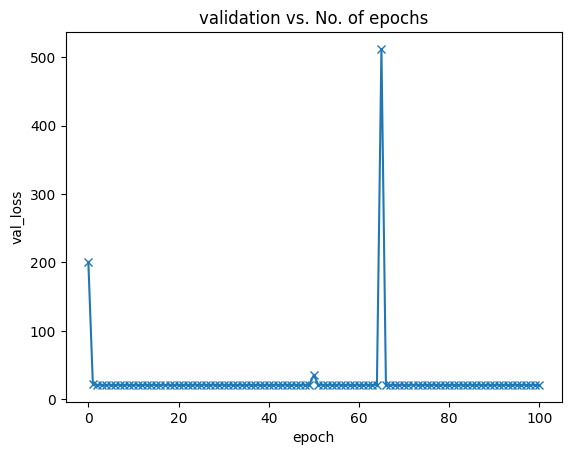

In [ ]:
plot_accuracies(history)